In [19]:
import pandas as pd
from sklearn import *
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
sheets = pd.read_excel("/Users/abasar/Downloads/CCPP/Folds5x2_pp.xlsx"
              , sheet_name=[0, 1, 2, 3, 4]).values()
df = pd.concat(sheets)
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [16]:
target = "PE"
X = df.drop(columns=[target]) # Features
y = df[target] # Label/outcome/target

# One hot Encoding - converts the categorical data into numeric
X = pd.get_dummies(X, drop_first=True)
features = X.columns

# X.values returns numpy array for the dataframe
# astype converts each feature to floating point number
X = X.values.astype("float")

# Divide the dataset into training and test
# Model is trained on training set 
# Model is evaluated on the test set
# Model has not seen the test data and assuming test records is a good 
# representation of future, we can get an idea how the model will perform
# in production
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                , test_size = 0.3, random_state = 1)



pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])


pipe.fit(X_train, y_train) 
# training is happening to build the model
# Essetially, the coefficients/weights/parameters values are calculated

# Doing the prediction
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("rmse for test: "
      , np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("rmse for train: "
      , np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("r2 for test: "
      , metrics.r2_score(y_test, y_test_pred))
print("r2 for train: "
      , metrics.r2_score(y_train, y_train_pred))

rmse for test:  4.5690823234830775
rmse for train:  4.552038643335909
r2 for test:  0.9284503317586209
r2 for train:  0.928796240630408


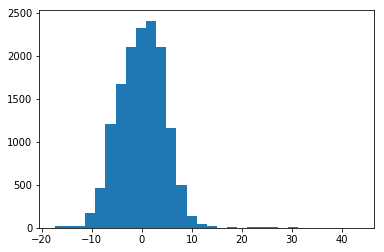

In [21]:
residuals_test = y_test_pred - y_test
plt.hist(residuals_test, bins = 30);

Text(0, 0.5, 'residual')

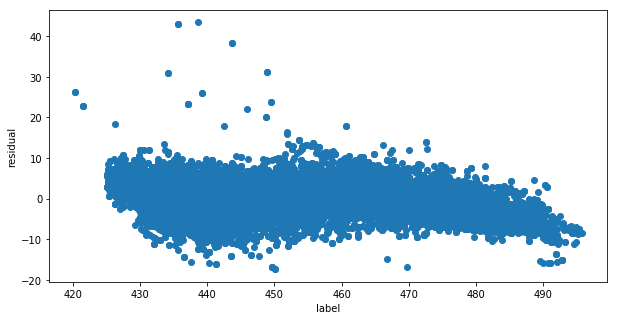

In [24]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, residuals_test)
plt.xlabel("label")
plt.ylabel("residual")

In [30]:
est = pipe.steps[-1][-1]
pd.DataFrame({"feature": features, "coefficient": est.coef_})

,feature,coefficient
0,AT,-14.735987
1,V,-2.963096
2,AP,0.383009
3,RH,-2.308446
